<a href="https://colab.research.google.com/github/lutfiaanjani/Study_Independent/blob/main/PCA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.569420,0.145342,0.666745,0.583516,0.475617,0.129995,0.037872,0.888442,0.968503,0.045800,A
1,0.295731,0.498200,0.951505,0.865668,0.798929,0.545831,0.105204,0.654283,0.426228,0.502924,C
2,0.567398,0.192133,0.067173,0.399901,0.335643,0.445312,0.039138,0.737694,0.951171,0.708779,C
3,0.768500,0.699378,0.150770,0.290819,0.032641,0.783778,0.494598,0.836103,0.217944,0.258233,A
4,0.557769,0.879045,0.900704,0.263515,0.817607,0.107475,0.529125,0.548238,0.859672,0.488155,C


In [2]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
x = df.loc[:, features].values

In [3]:
y = df.loc[:,['label']].values

In [4]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.569420,0.145342,0.666745,0.583516,0.475617,0.129995,0.037872,0.888442,0.968503,0.045800
1,0.295731,0.498200,0.951505,0.865668,0.798929,0.545831,0.105204,0.654283,0.426228,0.502924
2,0.567398,0.192133,0.067173,0.399901,0.335643,0.445312,0.039138,0.737694,0.951171,0.708779
3,0.768500,0.699378,0.150770,0.290819,0.032641,0.783778,0.494598,0.836103,0.217944,0.258233
4,0.557769,0.879045,0.900704,0.263515,0.817607,0.107475,0.529125,0.548238,0.859672,0.488155


In [5]:
pca = PCA(n_components=2)

In [6]:
principalComponents = pca.fit_transform(x)

In [7]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [8]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.402840,-0.205317
1,0.016181,-0.071977
2,0.188401,-0.719710
3,-0.052864,0.110644
4,0.187473,0.393915


In [9]:
df[['label']].head()

,label
0,A
1,C
2,C
3,A
4,C


In [10]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,0.402840,-0.205317,A
1,0.016181,-0.071977,C
2,0.188401,-0.719710,C
3,-0.052864,0.110644,A
4,0.187473,0.393915,C


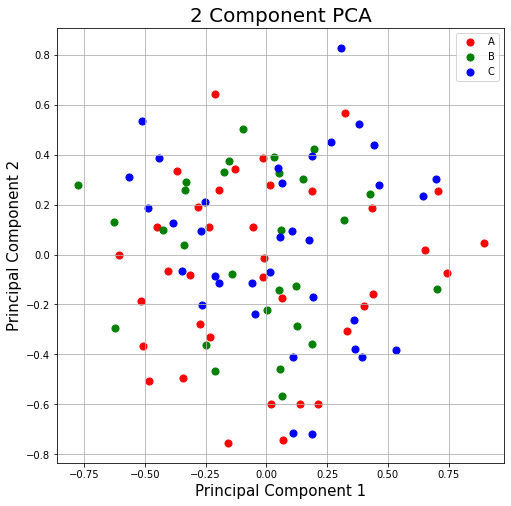

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()